In [1]:
from __future__ import print_function, division

import thinkdsp
import thinkplot
import thinkstats2

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

%matplotlib inline

### Exercise 4
A Geiger counter is a device that detects radiation. When an ionizing particle strikes the detector, it outputs a surge of current. The total output at a point in time can be modeled as uncorrelated Poisson (UP) noise, where each sample is a random quantity from a Poisson distribution, which corresponds to the number of particles detected during an interval.

Write a class called `UncorrelatedPoissonNoise` that inherits from `thinkdsp._Noise` and provides `evaluate`. It should use `np.random.poisson` to generate random values from a Poisson distribution. The parameter of this function, `lam`, is the average number of particles during each interval. You can use the attribute `amp` to specify `lam`. For example, if the framerate is 10 kHz and `amp` is 0.001, we expect about 10 “clicks” per second.

Generate about a second of UP noise and listen to it. For low values of `amp`, like 0.001, it should sound like a Geiger counter. For higher values it should sound like white noise. Compute and plot the power spectrum to see whether it looks like white noise. 

蓋革計數器是一種檢測輻射的設備。當電離粒子撞擊檢測器時，它將輸出電流浪湧。可以將某個時間點的總輸出建模為不相關的泊松（UP）噪聲，其中每個樣本都是來自泊松分佈的隨機量，它對應於在一個間隔內檢測到的粒子數。

編寫一個名為UncorrelatedPoissonNoise的類，該類繼承自thinkdsp._Noise並提供評估。它應該使用np.random.poisson從泊松分佈生成隨機值。該函數的參數lam是每個間隔內的平均粒子數。您可以使用屬性amp指定lam。例如，如果幀速率為10 kHz，安培為0.001，則我們期望每秒約10次“點擊”。

產生大約一秒鐘的UP噪聲並聆聽。對於較低的安培值（例如0.001），它聽起來應該像蓋革計數器。對於更高的值，它聽起來應該像白噪聲。計算並繪製功率譜，看它是否看起來像白噪聲。

In [19]:
class UncorrelatedPoissonNoise(thinkdsp._Noise):
    """Represents uncorrelated Poisson noise."""

    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        ys = np.random.poisson(lam= self.amp, size= len(ts))
        return ys

In [20]:
#np.random.poisson??
import numpy as np
import scipy.stats as st

#np.random.seed(1)
X1= np.random.poisson(lam= 10,size= 100)

#np.random.seed(0)
X2= st.poisson.rvs(mu= 10, size= 100)



X1.mean(), X1.var(), \
X2.mean(), X2.var(), \
X1, X2

(9.75,
 9.8675,
 10.18,
 12.847599999999998,
 array([10,  8,  8,  7,  8, 10, 14,  8,  5,  3, 11,  6,  8,  5,  6, 14, 11,
         8, 10, 10, 14,  5,  6,  8,  7, 12,  8, 10, 10, 11,  4, 11, 11,  7,
        15, 16, 12, 10,  7,  9,  6,  7, 13, 17, 10, 13,  9,  9, 11, 10,  9,
        10,  8,  9,  8, 18,  7,  7, 10, 14, 10, 13, 11, 15, 14, 10,  8, 14,
         8, 10,  9,  8, 11,  6, 10,  7, 15,  6, 13,  4,  4, 10, 10, 11,  9,
        15, 12,  7, 13,  9,  9, 12, 13,  7,  5,  7, 16, 12, 10, 14]),
 array([ 7, 12,  9,  7,  8, 12,  8, 16,  9,  8, 18,  8, 13,  9,  5,  5,  9,
        10,  6, 12,  7, 12,  8,  9,  8,  7,  9,  9,  8, 11,  4,  7, 17, 20,
        14, 13,  9, 13, 12,  7,  7, 13, 12,  4,  7, 15, 13, 15,  6,  8,  9,
        12,  6, 11, 12, 10, 12, 13, 12, 11,  9, 10, 13, 19,  8,  7, 11,  9,
        10,  9, 14,  3, 14,  6,  9, 11,  9, 12, 18,  6,  7, 15,  6,  7, 14,
        10, 14,  4, 10, 13,  9,  9, 13, 10, 14,  9,  2, 18, 11, 13]))

Here's what it sounds like at low levels of "radiation".

這就是“輻射”水平較低時的聲音。

In [21]:
amp = 0.001
framerate = 10000
duration = 1

signal = UncorrelatedPoissonNoise(amp=amp)
wave = signal.make_wave(duration=duration, framerate=framerate)
wave.make_audio()

To check that things worked, we compare the expected number of particles and the actual number:

為了檢查事情是否正常，我們將粒子的預期數量與實際數量進行比較：

In [22]:
expected = amp * framerate * duration
actual = sum(wave.ys)
print(expected, actual)

10.0 12


Here's what the wave looks like:

這是波浪的樣子：

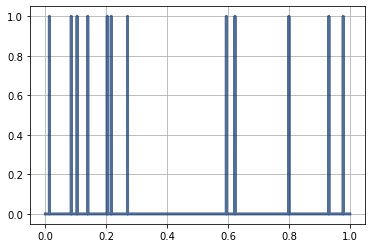

In [23]:
wave.plot()

And here's its power spectrum on a log-log scale.

這是其對數對數刻度的功率譜。

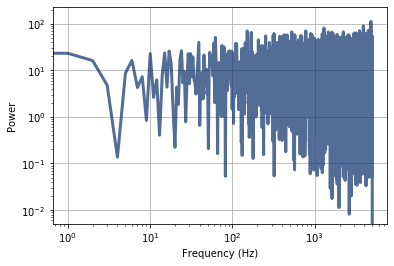

In [24]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Power',
                 xscale='log', 
                 yscale='log')

Looks like white noise, and the slope is close to 0.

看起來像白噪聲，並且斜率接近0。

In [25]:
spectrum.estimate_slope().slope

nan

With a higher arrival rate, it sounds more like white noise:

到達率較高時，聽起來更像是白噪聲：

In [26]:
amp = 1
framerate = 10000
duration = 1

signal = UncorrelatedPoissonNoise(amp=amp)
wave = signal.make_wave(duration=duration, framerate=framerate)
wave.make_audio()

It looks more like a signal:

它看起來更像一個信號：

(0, 0.1)

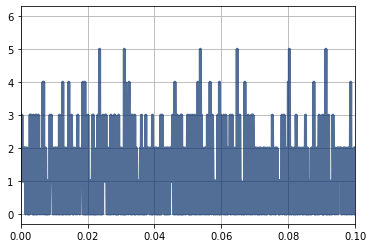

In [27]:
import matplotlib.pylab as pl

wave.plot()

pl.xlim([0,.1])

And the spectrum converges on Gaussian noise.

頻譜收斂於高斯噪聲。

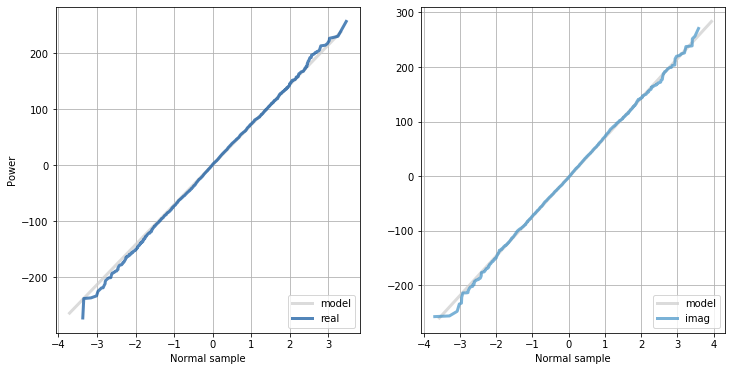

In [28]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0

thinkplot.preplot(2, cols=2)
thinkstats2.NormalProbabilityPlot(spectrum.real, label='real')
thinkplot.config(xlabel='Normal sample',
                 ylabel='Power',
                 legend=True,
                 loc='lower right')

thinkplot.subplot(2)
thinkstats2.NormalProbabilityPlot(spectrum.imag, label='imag')
thinkplot.config(xlabel='Normal sample',
                     loc='lower right')